In [152]:
import skimage.io
import skimage.exposure
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [136]:
image = skimage.io.imread("images/bie_threshold.jpeg")

In [137]:
def histogram(image):
    """Return the image histogram with 256 bins."""
    # Setup
    shape = np.shape(image)
    hist = np.zeros(256)

    if len(shape) == 3:
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')

    image_ravel = image.ravel()
    for pixel_value in image_ravel:
        hist[int(pixel_value)] += 1
    
    return hist

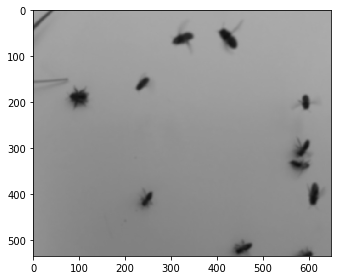

In [138]:
skimage.io.imshow(image)

172

In [139]:
hist = histogram(image)

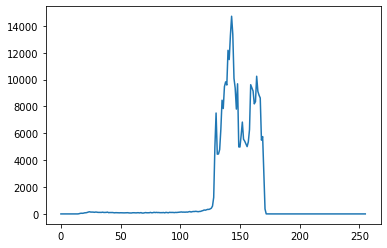

In [140]:
plt.plot(range(len(hist)), hist)
plt.show()

In [141]:
def threshold(image, th=None):
    """Return a binarised version of given image, thresholded at given value.

    Binarises the image using a global threshold `th`. Uses Otsu's method
    to find optimal thrshold value if the threshold variable is None. The
    returned image will be in the form of an 8-bit unsigned integer array
    with 255 as white and 0 as black.

    Parameters
    ----------
    image : np.ndarray
        Image to binarise. If this image is a colour image then the last
        dimension will be the colour value (as RGB values).
    th : numeric
        Threshold value. Uses Otsu's method if this variable is None.

    Returns
    -------
    binarised : np.ndarray(dtype=np.uint8)
        Image where all pixel values are either 0 or 255.
    """
    # Setup
    shape = np.shape(image)
    binarised = np.zeros([shape[0], shape[1]], dtype=np.uint8)

    if len(shape) == 3:
        image = image.mean(axis=2)
    elif len(shape) > 3:
        raise ValueError('Must be at 2D image')

    if th is None:
        th = otsu(image)

    print(f"Threshold: {th}")
    binary = image > th
    
    binarised = (binary + binarised)*255

    return binarised

In [150]:
def otsu(image):
    """Find the optimal thresholdvalue of given image using Otsu's method."""
    hist = histogram(image)
    probabilites = hist/sum(hist)
    thresholds = np.array(range(len(probabilites)))
    weighted_prob = np.multiply(probabilites, thresholds)
    otsu_th = 0
    max_var = 0
    for th in range(len(probabilites)):
        if th == 0:
            continue
        else:
            w_0 = sum(probabilites[:th])
            w_1 = sum(probabilites[th:])
            u_0 = sum(weighted_prob[:th])/w_0
            u_1 = sum(weighted_prob[th:])/w_1
            temp_max_var = w_0*w_1*(u_0-u_1)**2
            if temp_max_var >= max_var:
                max_var = temp_max_var
                otsu_th = th
    return otsu_th

Threshold: 105


C:\Users\hej\Miniconda3\envs\skola\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\hej\Miniconda3\envs\skola\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


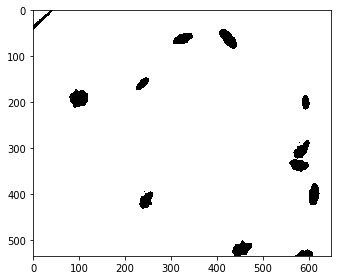

In [151]:
def main():
    image = skimage.io.imread("images/bie_threshold.jpeg")
    binarised = threshold(image)
    skimage.io.imshow(binarised)
    
main()

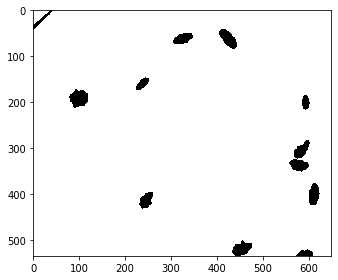

In [160]:
img = cv.imread('images/bie_threshold.jpeg',0)
skimage.io.imshow(img)
ret, otsu = cv.threshold(img,0,255,cv.THRESH_OTSU)
skimage.io.imshow(otsu)